# Slice demo

Esta es una pequeña demo de la clase Slice que he creado por si puede seros de utilidad. Esta clase sirve para trabajar de forma cómoda (aunque no necesariamente eficiente) con cortes en frecuencia (redshift) de los cubos de datos del SDC3. Cada Slice corresponde a una imagen de 2048x2048 píxeles.

### Unos pocos imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

%matplotlib inline

Importamos también la clase Slice:

In [2]:
from cube import Slice

El método más inmediato de la clase Slice es el que usamos para acceder a los datos del SDC3 y cargar el corte que deseemos. Este método se llama Slice.load() y toma como argumentos el índice de la Slice (es decir, el índice del array a lo largo del eje de frecuencias) y el tipo de pesado usado por los creadores de la simulación, que puede ser 'uniform' o 'natural'. Vamos a cargar la décima imagen del cubo pesado de forma 'uniform':

In [3]:
s = Slice.load(10,'uniform')

Slice tiene los siguientes atributos:
- islice: el índice a lo largo del eje de frecuencias
- data: la imagen 2048x2048 contenida en la Slice
- psf: la point spread function (o beam) de esa imagen
- header: el cabecero del archivo FITS que contenía el cubo.
- wcs: información acerca del World Coordinate System (necesario para pasar de coordenadas celestes a píxeles y viceversa)
- weighting: un recordatorio del tipo de pesado ('uniform' o 'natural') que tenemos.

Veamos algunos ejemplos:

In [4]:
s.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
NAXIS3  =                  901 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '           / Units are in Jansky per beam                   
BMAJ    =   0.01724196054110

In [5]:
s.weighting

'uniform'

In [6]:
s.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 0.0  -30.0  106000000.0  -5.0  
CRPIX : 1025.0  1025.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00444444444444444  0.00444444444444444  100000.0  1.0  
NAXIS : 2048  2048  901

## Propiedades de Slice


He programado algunas utilidades básicas, como por ejemplo dar a qué frecuencia corresponde la observación de la Slice, o cual es el redshift de la línea de 21 cm a esa frecuencia, etc. Os recomiendo que explreios por vuestra cuenta. Algunos ejemplos:

In [7]:
s.freq

<SpectralCoord 
   (target: <FK5 Coordinate (equinox=2000.0): (ra, dec, distance) in (deg, deg, kpc)
                (0., -30., 1000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>)
  107. MHz>

In [8]:
s.wavelenght

<SpectralCoord 
   (target: <FK5 Coordinate (equinox=2000.0): (ra, dec, distance) in (deg, deg, kpc)
                (0., -30., 1000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>)
  280.17986729 cm>

In [9]:
s.redshift21cm

12.274820109981183

Hay que hacer notar que las frecuencias crecen a lo largo del tercer eje del cubo, lo cual significa que los redshifts _decrecen_ en esa dirección.

## Algunas utilidades relacionadas con píxeles:

Como por ejemplo dar el tamaño del píxel, pasar de píxel a coordenada celeste y viceversa, o pasar de pixel de la imagen a pixel de HEALPix a un NSIDE dado:

In [10]:
s.pixsize

<Quantity 16. arcsec>

In [11]:
s.pixel_coordinate(1000,1378)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (0.12634998, -28.43085371)>

In [12]:
from astropy.coordinates import SkyCoord
import astropy.units as u
c = SkyCoord(-0.4,-32,unit=u.deg,frame='icrs')
i,j = s.coordinate_pixel(c)
print('(',i,',',j,')')

( 1101.32315401082 , 574.9587481232772 )


In [13]:
nside = 4*2048
s.pixel2healpix(1034,405,nside)

795744879

## Plotting

Podemos hacer plots de las imágenes (enteras o en secciones) y de la psf:

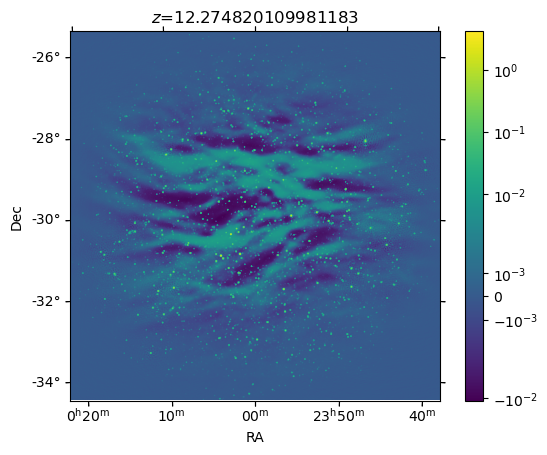

In [14]:
s.plot()

El mismo gráfico, utilizando frecuencias en el título:

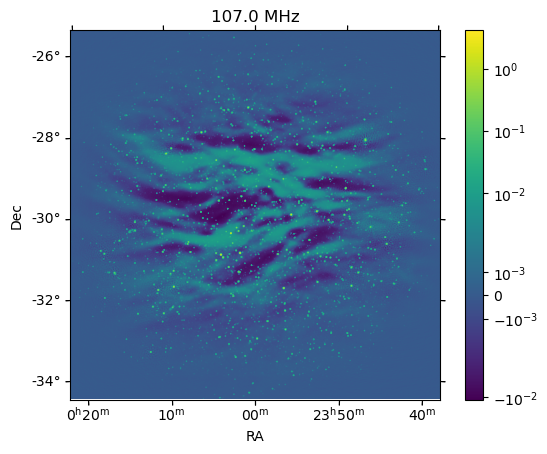

In [15]:
s.plot(title_z=False)

Plot de una región de 128x128 píxeles en torno al pixel (1000,1300):

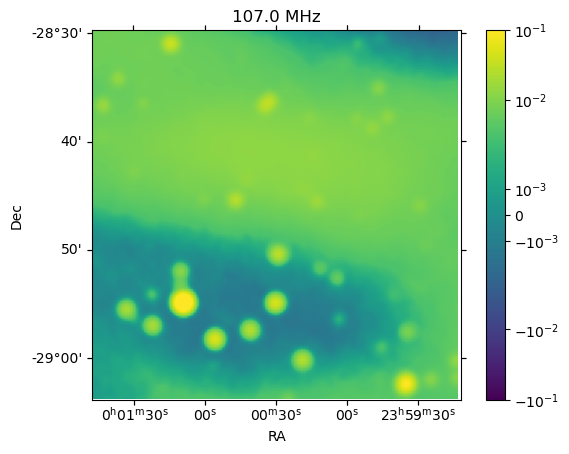

In [16]:
s.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

Plot de la psf:

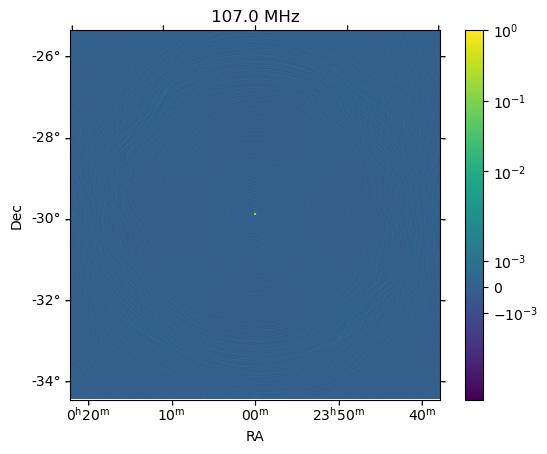

In [17]:
s.plot_psf(title_z=False)

Fijaos, poniendo mucho cuidado, en las ondas que se extienden desde el centro. La psf de las Slices del cubo con normalización natural son mucho más feas:

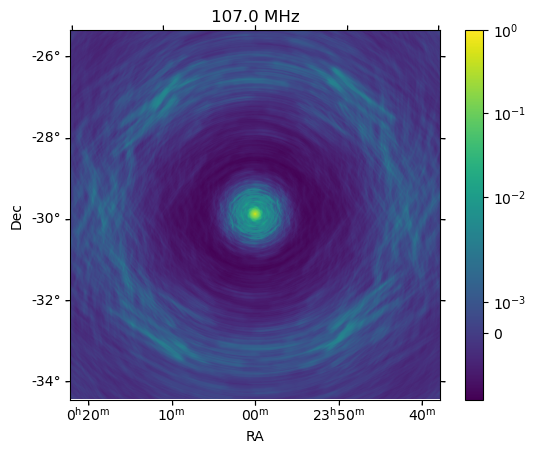

In [18]:
Slice.load(10,'natural').plot_psf(title_z=False)

¡Sauron os está observando!

## PSF fitting

Podemos hacer un ajuste gaussiano al beam:

 
 Gaussian fit parameters:
     X center     =  32.00001485261653
     Y center     =  32.00000681837144
     Amplitude    =  1.0040233506689824
     Sigma (pix)  =  1.6395604689327794
     Residual rms =  0.0027182355173504193
 


<Quantity 61.77391772 arcsec>

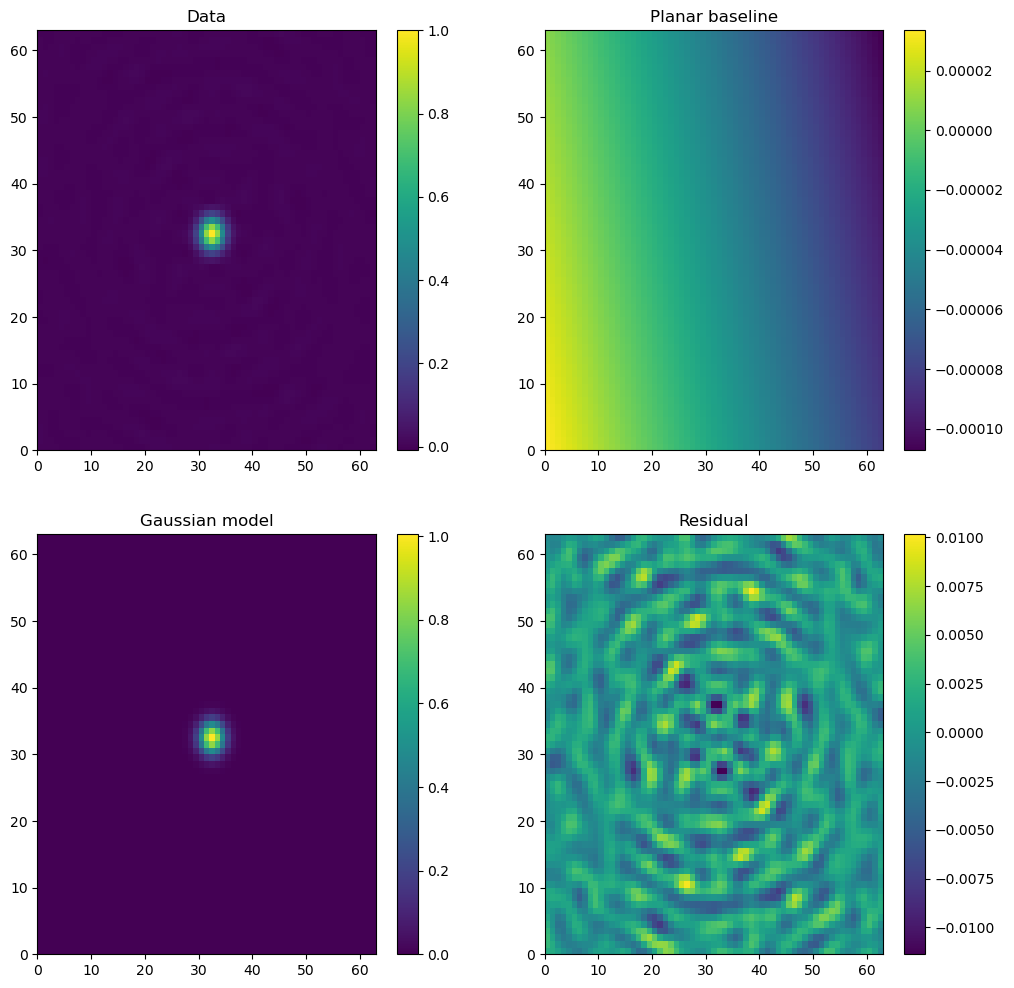

In [19]:
s.psf_fit(verbose=True,toplot=True)

Las figuras de arriba se explican solas. El ajuste se hace a una baseline plana más una gaussiana. : arriba a la izquierda está Slice.psf, a la derecha la baseline que dale del ajuste (prácticamente compatible con un plano de valor cero), abajo a la izquerda el mejor ajuste gaussiano y abajo a la derecha el residuo alcachofil.

No es necesaria tanta parafernalia para acceder a la fwhm efectiva. Esta se puede dar directamente en unidades angulares o en número de píxeles:

In [20]:
s.fwhm

<Quantity 61.77391772 arcsec>

In [21]:
s.fwhm_pix

3.860869857283252

Esta FWHM varía muy poco con la frecuencia. Me he hecho el cálculo y este es el resultado:

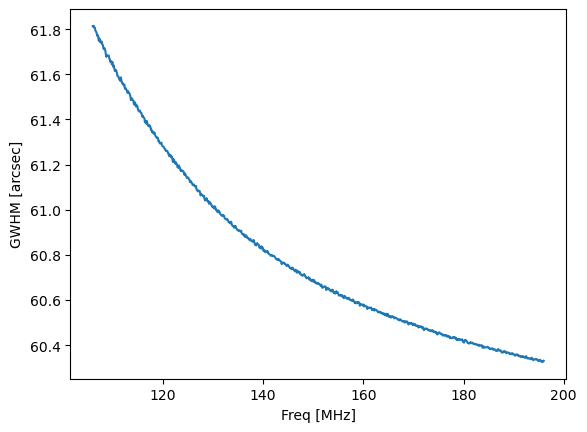

In [22]:
t = Table.read('/home/dherranz/SDC3/Data/fwhm_table_uniform.fits')
plt.plot(t['freq'],t['fwhm']);
plt.xlabel('Freq [MHz]');
plt.ylabel('GWHM [arcsec]');

Con el pesado natural la psf se ajusta muy mal a una gaussiana:

 
 Gaussian fit parameters:
     X center     =  31.932710303746017
     Y center     =  31.918252210661734
     Amplitude    =  0.3273260704554675
     Sigma (pix)  =  11.750497032960393
     Residual rms =  0.026639292898023095
 


<Quantity 442.72489524 arcsec>

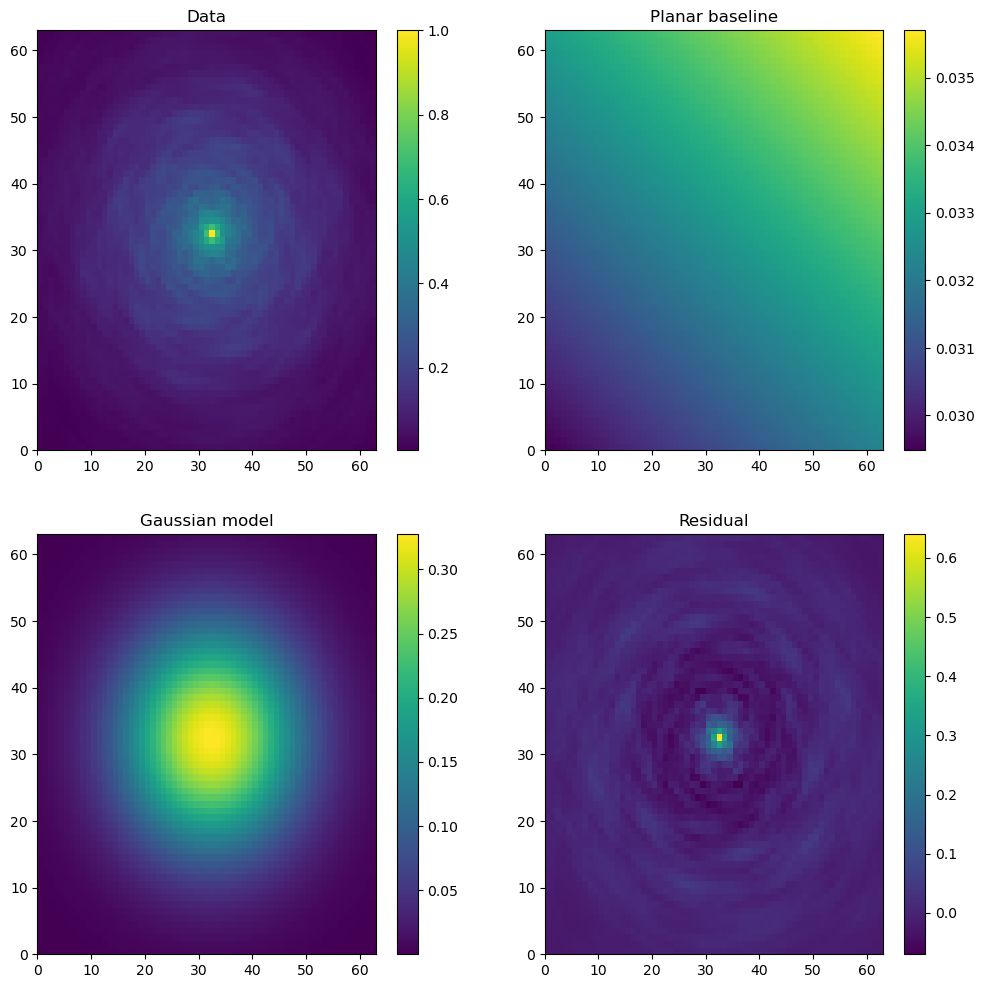

In [23]:
Slice.load(10,'natural').psf_fit(verbose=True,toplot=True)

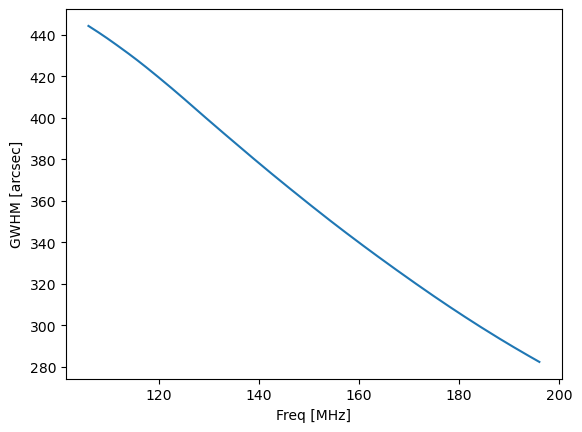

In [24]:
t = Table.read('/home/dherranz/SDC3/Data/fwhm_table_natural.fits')
plt.plot(t['freq'],t['fwhm']);
plt.xlabel('Freq [MHz]');
plt.ylabel('GWHM [arcsec]');

Esto último no hay que creérselo mucho, dado lo mal que ajustan los datos.

## Matched filtering

Por úlitmo, hay tres métodos para filtrar con un matched filter, aunque solo recomiendo los dos primeros. En primer lugar, un matched filter utilizando la psf como perfil con el que filtrar:

In [25]:
matched_s = s.matched_filter(nbins=512)

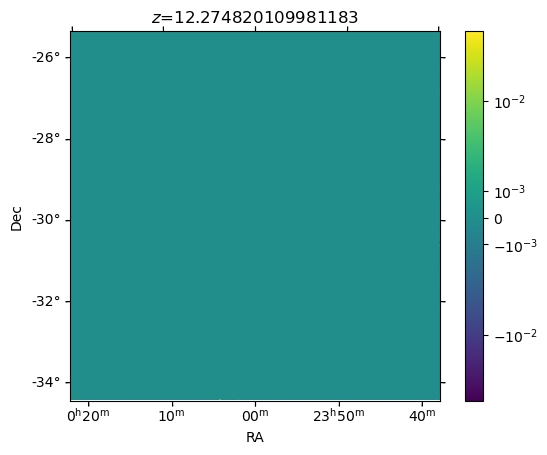

In [26]:
matched_s.plot()

Hay que hacer un zoom para ver qué ha ocurrido:

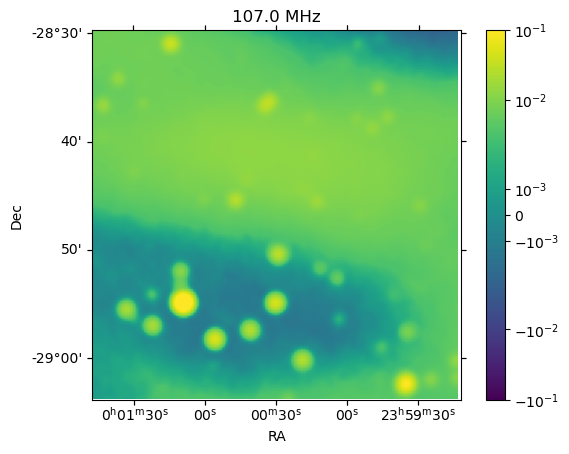

In [27]:
s.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

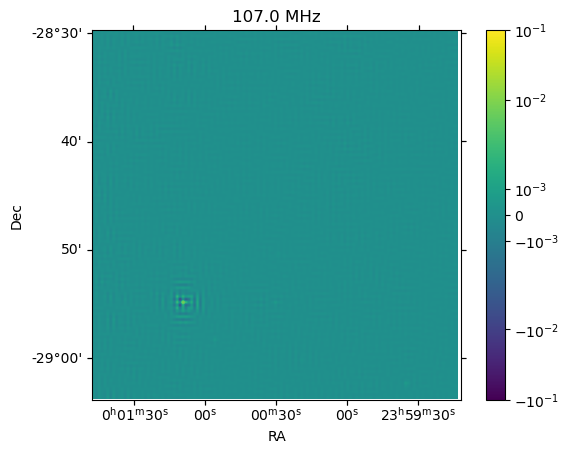

In [28]:
matched_s.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

Obsérvese el artefacto tan potente que aparece en el filtrado. Esto es debido a que la psf es asimétrica y altamente irregular. Por eso recomiendo un filtrado sub-óptimo utilizando una aproximación al perfil gaussiano:

In [29]:
gmatched_s = s.ideal_matched_filter(nbins=512)

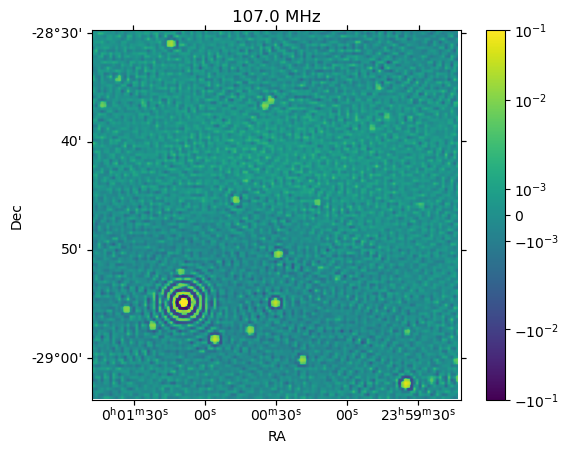

In [30]:
gmatched_s.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

Ahora el aspecto es mejor, pero fijaos que el anillado es fortísimo y no nos lo quita nadie (porque los datos contienen "alcachofas", como las ha bautizado Marcos.

### Apéndice: qué pasa con los datos pesados de forma natural

In [31]:
sn = Slice.load(10,'natural')

In [32]:
matched_sn  = sn.matched_filter(nbins=512)
gmatched_sn = sn.ideal_matched_filter(nbins=512)

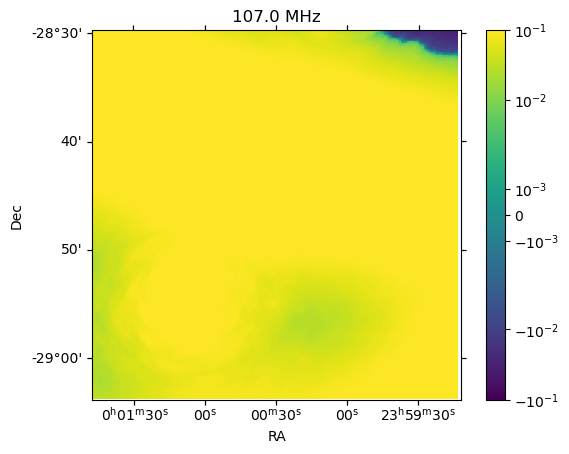

In [33]:
sn.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

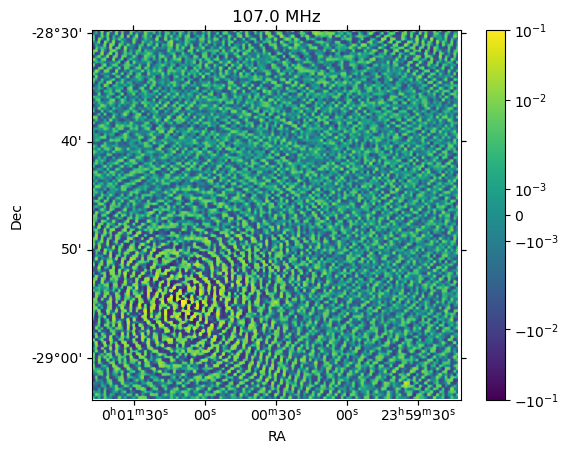

In [34]:
matched_sn.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

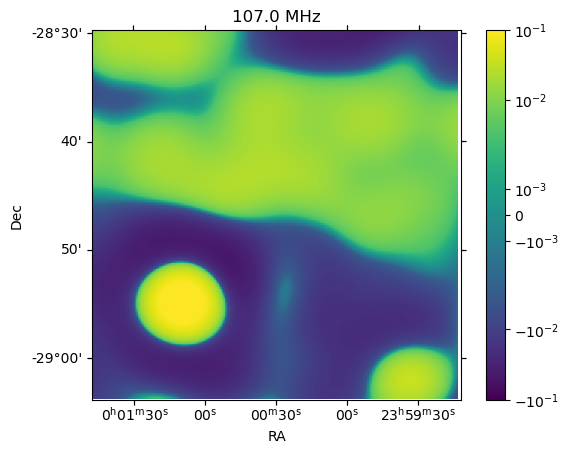

In [35]:
gmatched_sn.plot(title_z=False,stamp=True,ij=(1000,1300),lsize=128)

Sin hacer zoom:

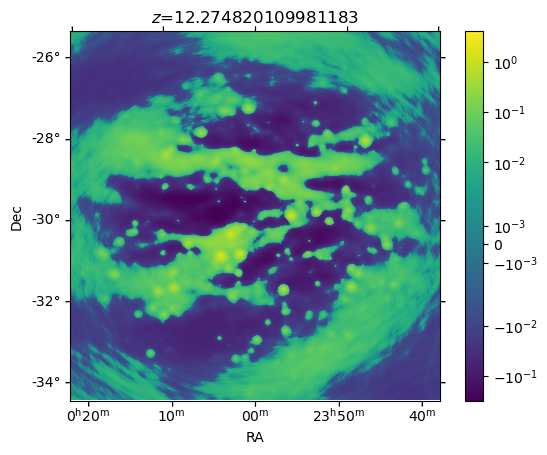

In [36]:
sn.plot()

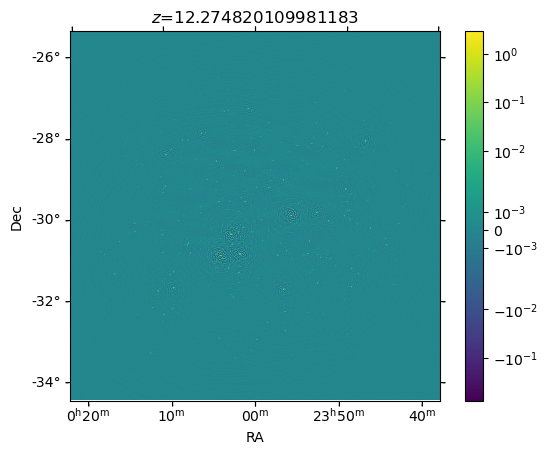

In [37]:
matched_sn.plot()

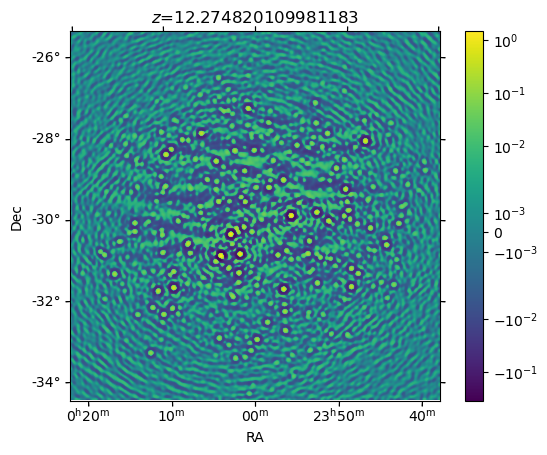

In [38]:
gmatched_sn.plot()

Curioso a la par que horripilante...